
Changements de performance par rapport à la version de base:
                              humaneval-python   java javascript    cpp
Model                                                                  
Phind-CodeLlama-34B-v1                    -6.1  -4.59      -0.89  -1.78
Phind-CodeLlama-34B-Python-v1            -1.73  -5.34        0.9  -4.25
CodeLlama-34b-Instruct                  -21.16 -12.53     -19.49 -18.06
CodeLlama-34b                           -26.84 -13.87     -23.68 -18.17
CodeLlama-34b-Python                    -18.66  -14.6     -20.62  -20.5

Changements de performance pour WizardCoder:
                            humaneval-python   java javascript    cpp
Model                                                                
WizardCoder-Python-13B-V1.0            -8.54  -3.17      -6.83  -4.34
WizardCoder-15B-V1.0                  -12.61  -9.17     -13.37  -8.25
WizardCoder-3B-V1.0                   -37.81  -20.6     -29.12 -22.26
WizardCoder-1B-V1.0                   

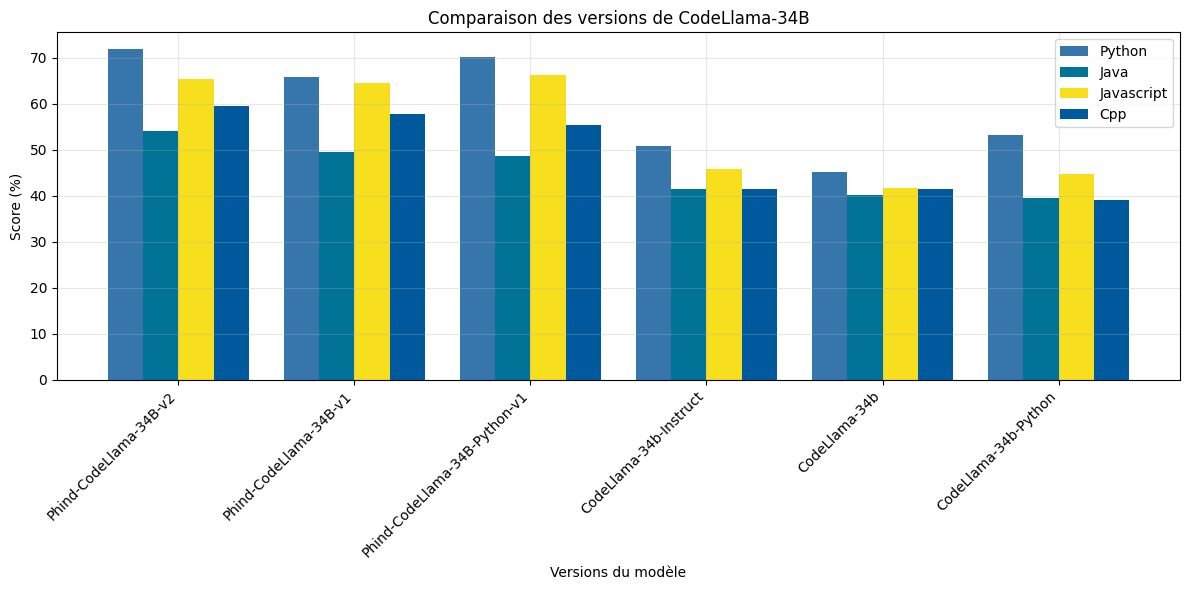

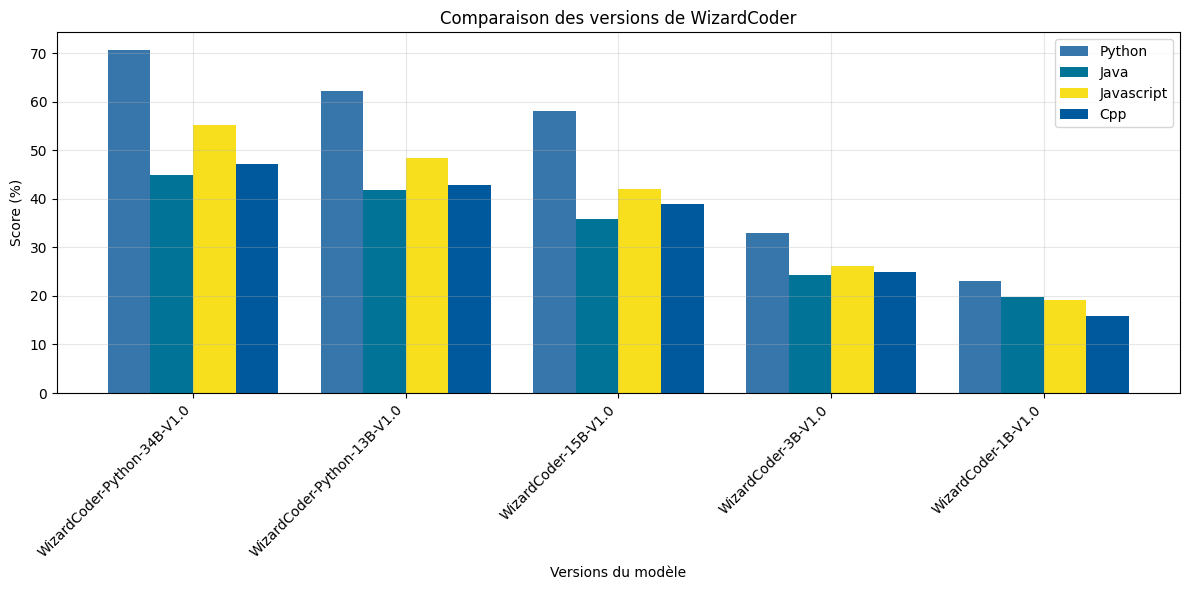

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(file_path):
    """
    Charge et prépare les données du CSV
    """
    df = pd.read_csv(file_path)
    return df

def analyze_model_versions(df, base_model_name):
    """
    Analyse les différentes versions d'un même modèle
    """
    # Filtrer pour le modèle spécifique
    model_df = df[df['Model'].str.contains(base_model_name, case=False)]

    # Langages à analyser
    languages = ['humaneval-python', 'java', 'javascript', 'cpp']

    return model_df[['Model'] + languages]

def plot_model_comparison(model_df, title):
    """
    Crée un graphique comparatif des performances
    """
    # Préparation des données pour le plot
    plt.figure(figsize=(12, 6))

    # Création du graphique à barres groupées
    x = range(len(model_df))
    width = 0.2

    languages = ['humaneval-python', 'java', 'javascript', 'cpp']
    colors = ['#3776AB', '#007396', '#F7DF1E', '#00599C']

    for i, (lang, color) in enumerate(zip(languages, colors)):
        plt.bar([xi + width*i for xi in x],
                model_df[lang],
                width,
                label=lang.replace('humaneval-', '').capitalize(),
                color=color)

    plt.xlabel('Versions du modèle')
    plt.ylabel('Score (%)')
    plt.title(title)
    plt.xticks([xi + width*1.5 for xi in x],
               model_df['Model'],
               rotation=45,
               ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    return plt

def calculate_performance_changes(model_df):
    """
    Calcule les changements de performance entre versions
    """
    base_model = model_df.iloc[0]
    changes = pd.DataFrame()

    for _, row in model_df.iloc[1:].iterrows():
        diff = row[['humaneval-python', 'java', 'javascript', 'cpp']] - \
               base_model[['humaneval-python', 'java', 'javascript', 'cpp']]
        changes = pd.concat([changes, diff.to_frame().T])

    changes.index = model_df.iloc[1:]['Model']
    return changes

def main():
    # Charger les données
    df = load_and_prepare_data('./data_code_eval_board.csv')

    # Analyser CodeLlama-34B
    codellama_df = analyze_model_versions(df, 'CodeLlama-34b')

    # Créer la visualisation
    plt = plot_model_comparison(codellama_df, 'Comparaison des versions de CodeLlama-34B')
    plt.savefig('codellama_comparison.png')

    # Calculer les changements
    changes = calculate_performance_changes(codellama_df)
    print("\nChangements de performance par rapport à la version de base:")
    print(changes.round(2))

    # Analyser WizardCoder
    wizard_df = analyze_model_versions(df, 'WizardCoder')

    # Créer la visualisation pour WizardCoder
    plt = plot_model_comparison(wizard_df, 'Comparaison des versions de WizardCoder')
    plt.savefig('wizardcoder_comparison.png')

    # Calculer les changements pour WizardCoder
    wizard_changes = calculate_performance_changes(wizard_df)
    print("\nChangements de performance pour WizardCoder:")
    print(wizard_changes.round(2))

if __name__ == "__main__":
    main()